In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  
data = pd.read_csv("loan data.csv")

In [3]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 8


In [5]:
data.drop(['Loan_ID'],axis=1,inplace=True)

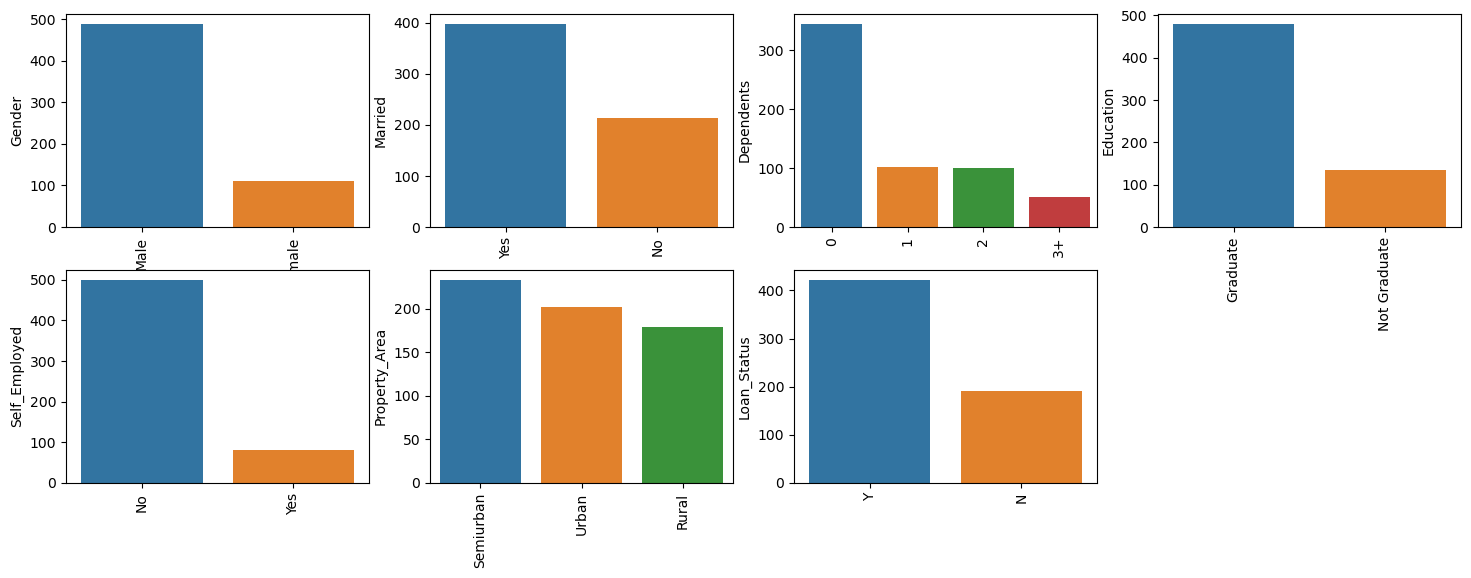

In [6]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1
  
for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [7]:

# Import label encoder
from sklearn import preprocessing
    
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

In [8]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<AxesSubplot:>

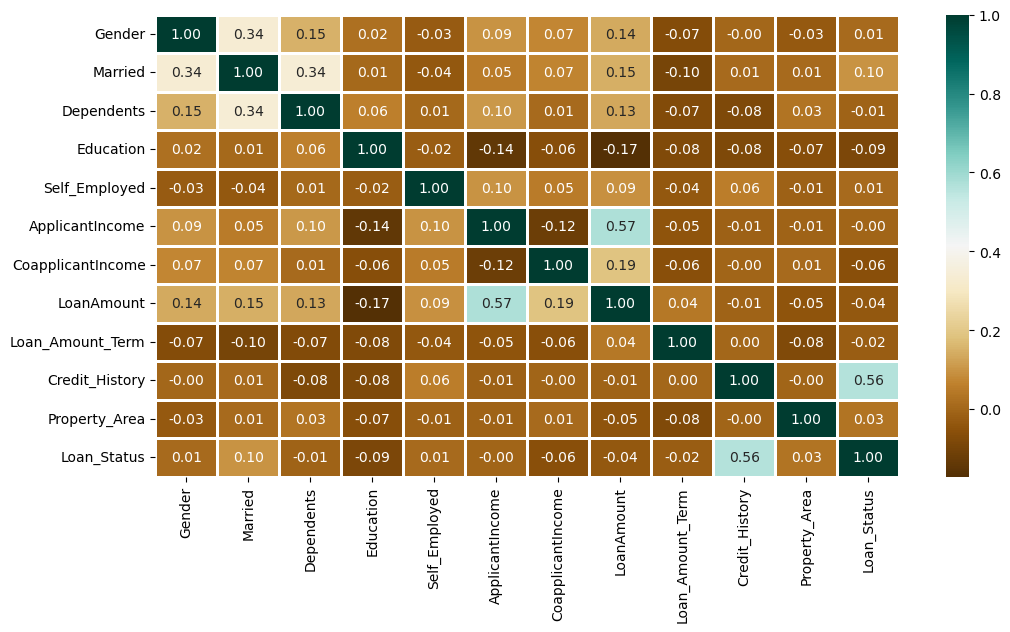

In [9]:
plt.figure(figsize=(12,6))
  
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

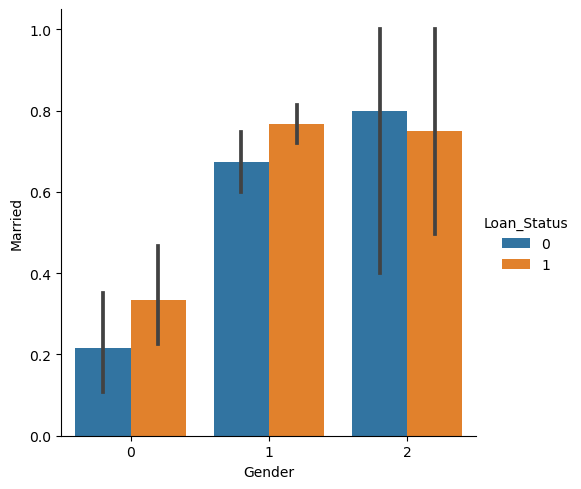

In [10]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status", 
            kind="bar", 
            data=data)

In [11]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean()) 
    
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
  
X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((368, 11), (246, 11), (368,), (246,))

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
  
from sklearn import metrics
  
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()
  
# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train, 
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 97.01086956521739
Accuracy score of  KNeighborsClassifier = 77.17391304347827
Accuracy score of  SVC = 70.38043478260869
Accuracy score of  LogisticRegression = 82.88043478260869


C:\Users\juturu vyshnavi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\juturu vyshnavi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [14]:
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 76.42276422764228
Accuracy score of  KNeighborsClassifier = 62.19512195121951
Accuracy score of  SVC = 67.07317073170732
Accuracy score of  LogisticRegression = 78.86178861788618


C:\Users\juturu vyshnavi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\juturu vyshnavi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [15]:
classifier=SVC()
classifier.fit(X_train,Y_train)

SVC()

In [16]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(Y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.67      1.00      0.80       165

    accuracy                           0.67       246
   macro avg       0.34      0.50      0.40       246
weighted avg       0.45      0.67      0.54       246



C:\Users\juturu vyshnavi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juturu vyshnavi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\juturu vyshnavi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
confusion_matrix(Y_test,classifier.predict(X_test))

array([[  0,  81],
       [  0, 165]], dtype=int64)

In [19]:
#checking the accuracy
print(accuracy_score(Y_pred,Y_test))
print("ANN Model")
print("confusion_matrix")
print(confusion_matrix(Y_test, Y_pred))
print("classification_report")
print(classification_report(Y_test, Y_pred))


0.7886178861788617
ANN Model
confusion_matrix
[[ 32  49]
 [  3 162]]
classification_report
              precision    recall  f1-score   support

           0       0.91      0.40      0.55        81
           1       0.77      0.98      0.86       165

    accuracy                           0.79       246
   macro avg       0.84      0.69      0.71       246
weighted avg       0.82      0.79      0.76       246



In [20]:
sample_value=[[0,1,0,1,1,3000,0,66,360,1,2]]

In [21]:
res=classifier.predict(sample_value)

C:\Users\juturu vyshnavi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [22]:
if res==1:
    print('prediction:high chance of approval')
else:
     print('prediction:low chance of approval')

prediction:high chance of approval
